# 0. Imports

In [1]:
from pathlib import Path
import pickle

import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = "retina"

# 1. Stationary Classification - Fashion MNIST

## 1.1 Method Comparison

MLP with layers (500, 500, 10). Tune hyperparameters wrt average validation set LL over the first 500 training examples. Test-set (10,000 examples) evaluation over 100 random initializations.

In [7]:
methods_st = {
    'sgd-rb-1-sgd': 'OGD',
    'sgd-rb-5-sgd': 'SGD-5',
    'sgd-rb-10-sgd': 'SGD-10',
    
    'sgd-rb-1-adam': 'OGD (Adam)',
    'sgd-rb-5-adam': 'SGD-5 (Adam)',
    'sgd-rb-10-adam': 'SGD-10 (Adam)',
    
    'fdekf': 'FDEKF',
    'vdekf': 'VDEKF',
    
    'lofi-5-diagonal': 'LOFI-DIAG-5',
    'lofi-10-diagonal': 'LOFI-DIAG-10',
    # 'lofi-5-spherical': 'LOFI-SPH-5',
    # 'lofi-10-spherical': 'LOFI-SPH-10',
}

n_iter = 100

In [8]:
path_st = Path(Path.cwd(), "output", "stationary")

results_miscl_st, results_nll_st = {}, {}

for method in methods_st:
    with open(Path(path_st, f'{method}_miscl.pkl'), "rb") as f:
        curr_miscl = pickle.load(f)
    with open(Path(path_st, f'{method}_nll.pkl'), "rb") as f:
        curr_nll = pickle.load(f)
    results_miscl_st[method] = curr_miscl
    results_nll_st[method] = curr_nll

Misclassification Rate

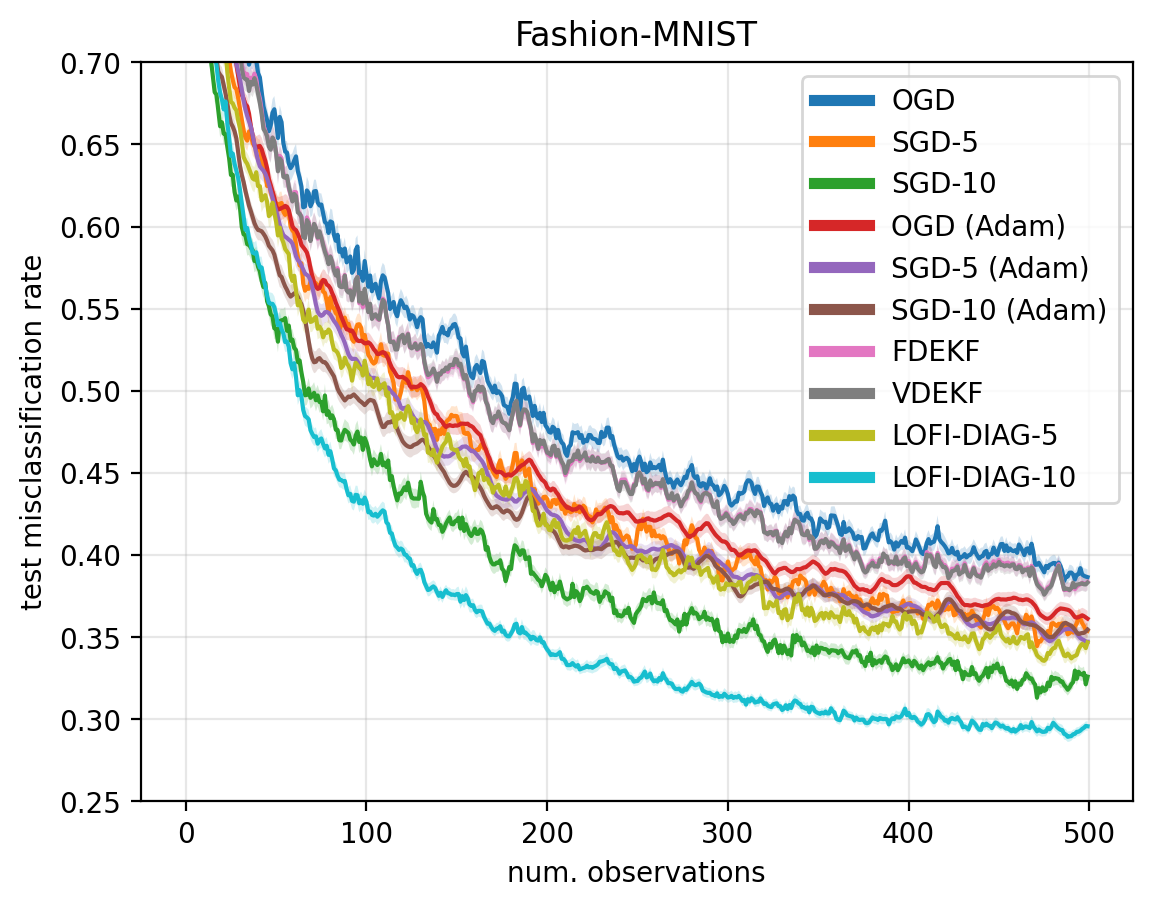

In [9]:
fig, ax = plt.subplots()
for key, val in results_miscl_st.items():
    mean, std = val['mean'], val['std']
    ax.plot(mean, label=methods_st[key])
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate')
ax.set_ylim(0.25, 0.7)
ax.grid(alpha=0.3)
ax.set_title('Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_st, 'stationary-mnist-clf-test-miscl.pdf'), bbox_inches='tight')

Negative Log Likelihood

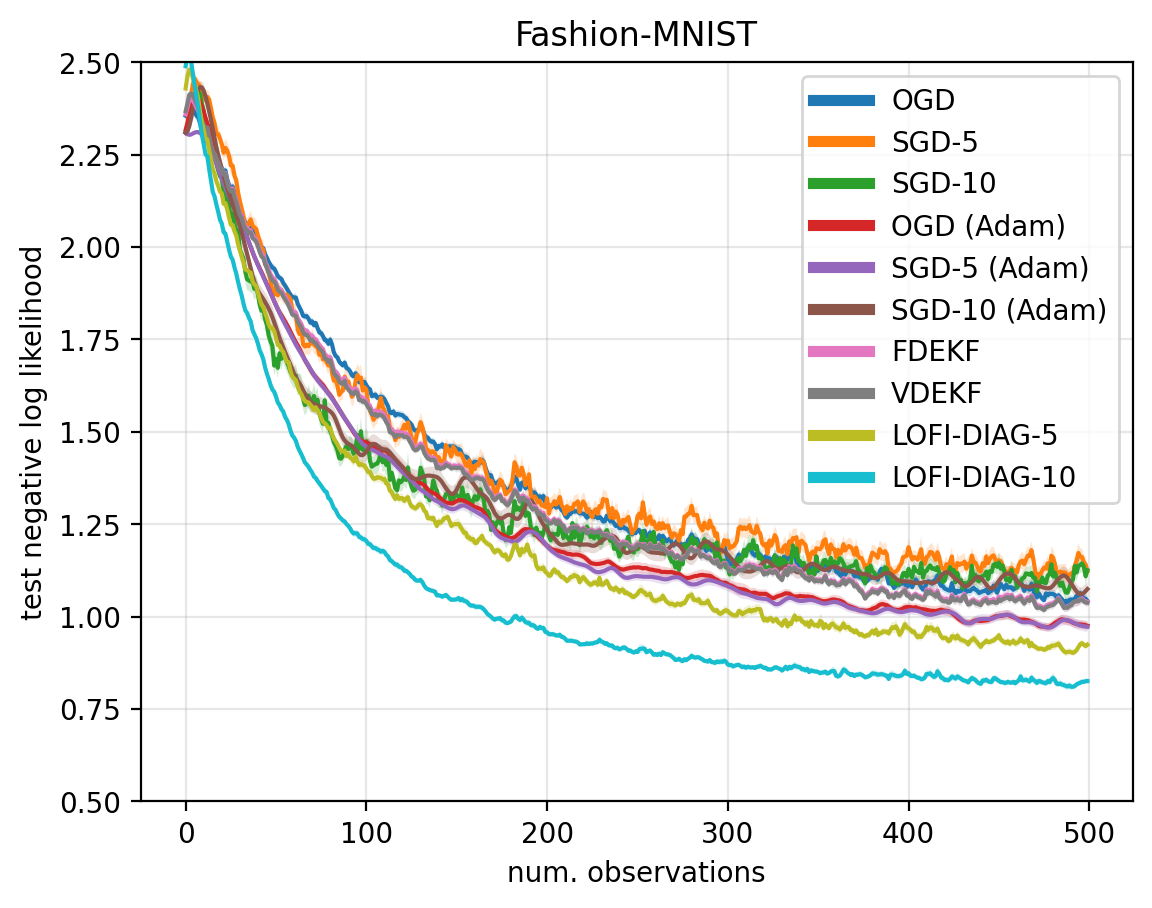

: 

In [10]:
fig, ax = plt.subplots()
for key, val in results_nll_st.items():
    mean, std = val['mean'], val['std']
    ax.plot(mean, label=methods_st[key])
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood')
ax.set_ylim(0.5, 2.5)
ax.grid(alpha=0.3)
ax.set_title('Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_st, 'stationary-mnist-clf-test-nll.pdf'), bbox_inches='tight')

## 1.2 LOFI Comparison

In [ ]:
lofi_methods_st = {
    'lofi-1-diagonal': 'LOFI-DIAG-1',
    'lofi-5-diagonal': 'LOFI-DIAG-5',
    'lofi-10-diagonal': 'LOFI-DIAG-10',
    'lofi-20-diagonal': 'LOFI-DIAG-20',
    'lofi-50-diagonal': 'LOFI-DIAG-50',
    'lofi-1-spherical': 'LOFI-SPH-1',
    'lofi-5-spherical': 'LOFI-SPH-5',
    'lofi-10-spherical': 'LOFI-SPH-10',
    'lofi-20-spherical': 'LOFI-SPH-20',
    'lofi-50-spherical': 'LOFI-SPH-50',
}

n_iter = 100

In [ ]:
path_st = Path(Path.cwd(), "output", "stationary")

lofi_results_miscl_st, lofi_results_nll_st = {}, {}
key = jr.PRNGKey(0)

for method in methods_st:
    key, *subkeys = jr.split(key, 3)
    with open(Path(path_st, f'{method}_miscl.pkl'), "rb") as f:
        curr_miscl = pickle.load(f)
        # Add vertical jitters
        curr_miscl = {
            "mean": curr_miscl["mean"] + 0.01 * jr.normal(subkeys[0], curr_miscl["mean"].shape),
        }
    with open(Path(path_st, f'{method}_nll.pkl'), "rb") as f:
        curr_nll = pickle.load(f)
        # Add vertical jitters
        curr_nll = {
            "mean": curr_nll["mean"] + 0.05 * jr.normal(subkeys[1], curr_nll["mean"].shape),
        }
    lofi_results_miscl_st[method] = curr_miscl
    lofi_results_nll_st[method] = curr_nll

Misclassification Rate

In [ ]:
fig, ax = plt.subplots()
for key, val in lofi_results_miscl_st.items():
    mean, std = val['mean'], val['std']
    ax.plot(mean, label=methods_st[key])
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate')
ax.set_ylim(0.25, 0.7)
ax.grid(alpha=0.3)
ax.set_title('Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_st, 'stationary-mnist-clf-test-miscl-lofi.pdf'), bbox_inches='tight')

Negative Log Likelihood

In [ ]:
fig, ax = plt.subplots()
for key, val in lofi_results_nll_st.items():
    mean, std = val['mean'], val['std']
    ax.plot(mean, label=methods_st[key])
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood')
ax.set_ylim(0.5, 2.5)
ax.grid(alpha=0.3)
ax.set_title('Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_st, 'stationary-mnist-clf-test-nll-lofi.pdf'), bbox_inches='tight')

# 2. Nonstationary Classification